One of the advantages of Keras is that it can import this dataset for you without needing to explicitly download it from the web (it will download it for you). We'll normalize the images and we'll convert the target data to one-hot encoding: 

In [1]:
from tensorflow import keras

(X_train, Y_train), (X_validation, Y_validation) = \
    keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 784) / 255
X_validation = X_validation.reshape(10000, 784) / 255

classes = 10
Y_train = keras.utils.to_categorical(Y_train, classes)
Y_validation = keras.utils.to_categorical(Y_validation, classes)

11490434/11490434 [==============================] - 0s 0us/step


Next, we'll define the network:

In [2]:
from keras import layers, models

input_size = 784
hidden_units = 100

model = models.Sequential([
    layers.Dense(
        hidden_units, input_dim=input_size),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(classes),
    layers.Activation('softmax')
])

Then, we'll run the training for 20 epochs:

In [3]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam')

model.fit(X_train, Y_train,
          batch_size=100, epochs=20,
          verbose=1)

Epoch 1/20
600/600 [==============================] - 14s 19ms/step - loss: 0.3112 - accuracy: 0.9141
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.1442 - accuracy: 0.9589
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1017 - accuracy: 0.9720
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0791 - accuracy: 0.9781
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0645 - accuracy: 0.9821
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0543 - accuracy: 0.9848
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0442 - accuracy: 0.9871
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9901
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0326 - accuracy: 0.9908
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0277 - accuracy: 0.99

Finally, we'll evaluate the network:

In [4]:
score = model.evaluate(X_validation, Y_validation, verbose=1)
print('Validation accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9774
Validation accuracy: 0.977400004863739


We'll visualize the weights of the hidden layer:

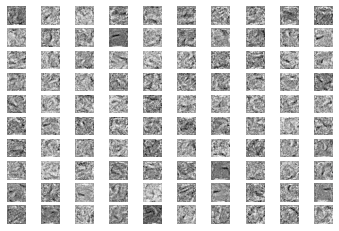

In [5]:
weights = model.layers[0].get_weights()

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

fig = plt.figure()

w = weights[0].T
for unit in range(hidden_units):
    ax = fig.add_subplot(10, 10, unit + 1)
    ax.axis("off")
    ax.imshow(numpy.reshape(w[unit], (28, 28)), cmap=cm.Greys_r)

plt.show()